In [ ]:
import pandas as pd

def safe_load(name: str) -> pd.DataFrame:
    if catalog.exists(name):
        return catalog.load(name)
    print(f"[ADVERTENCIA] {name} no existe en el catálogo.")
    return pd.DataFrame()

df_diabetes = safe_load("diabetes_raw")
df_cardio = safe_load("cardio_raw")
df_cardiabetes = safe_load("cardiabetes_raw")

df_diabetes.head(10)


[09/24/25 10:18:44] INFO     Loading data from diabetes_raw (CSVDataset)...                    ]8;id=984356;file://C:\Users\Roxana\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=293318;file://C:\Users\Roxana\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardio_raw (CSVDataset)...                      ]8;id=114433;file://C:\Users\Roxana\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=561877;file://C:\Users\Roxana\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardiabetes_raw (CSVDataset)...                 ]8;id=908571;file://C:\Users\Roxana\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=331458;file://C:\Users\Roxana\AppData\Local\Programs\Python\Python313\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Edad,Cuartil_Edad,Sexo,Tipo_Diabetes,IMC,HbA1c,Insulina,Colesterol_Total,LDL,HDL,Trigliceridos,PAS,PAD,Registro
0,43,Q2,Mujer,Tipo 2,36.7,8.52,194.12,222.24,129.79,47.16,167.35,149.8,94.3,2017
1,67,Q4,Mujer,Tipo 1,30.0,6.94,0.00,217.42,121.33,60.05,122.24,152.7,85.0,2013
2,55,Q3,Mujer,Tipo 2,34.7,6.20,100.56,219.90,132.84,54.86,136.30,155.3,93.7,2015
3,50,Q3,Mujer,Tipo 2,28.1,6.85,87.05,245.20,141.09,46.95,186.89,145.0,89.5,2015
4,35,Q1,Mujer,Tipo 2,32.9,6.55,155.21,229.99,131.17,43.23,166.42,135.2,83.5,2011
5,35,Q1,Hombre,No diabetes,21.3,5.38,36.53,212.02,107.11,59.80,115.82,112.3,70.1,2018
6,29,Q1,Hombre,No diabetes,27.5,5.18,36.33,192.80,111.98,61.71,118.42,123.7,71.8,2010
7,60,Q4,Mujer,Tipo 2,36.1,8.42,135.63,239.49,115.02,45.72,153.81,160.7,99.0,2014
8,50,Q3,Hombre,Tipo 2,35.5,6.11,78.54,241.45,118.57,35.00,154.94,153.3,99.1,2014
9,54,Q3,Hombre,Tipo 2,36.7,6.90,118.71,229.36,136.85,39.64,159.64,146.8,93.2,2010


In [ ]:
import numpy as np
from IPython.display import display

for name, df in [("diabetes_raw", df_diabetes), ("cardio_raw", df_cardio), ("cardiabetes_raw", df_cardiabetes)]:
    print(f"\n=== {name} ===")
    print(df.shape, "filas x columnas")
    display(df.head(5))
    print("Duplicados:", int(df.duplicated().sum()), "| Nulos totales:", int(df.isna().sum().sum()))
    display(df.isna().sum().sort_values(ascending=False).head(10).to_frame("nulos_top10"))
    binarias = [c for c in df.columns if df[c].dropna().nunique()==2]
    print("Candidatas binarias:", binarias[:12])



=== diabetes_raw ===
(8000, 14) filas x columnas


,Edad,Cuartil_Edad,Sexo,Tipo_Diabetes,IMC,HbA1c,Insulina,Colesterol_Total,LDL,HDL,Trigliceridos,PAS,PAD,Registro
0,43,Q2,Mujer,Tipo 2,36.7,8.52,194.12,222.24,129.79,47.16,167.35,149.8,94.3,2017
1,67,Q4,Mujer,Tipo 1,30.0,6.94,0.00,217.42,121.33,60.05,122.24,152.7,85.0,2013
2,55,Q3,Mujer,Tipo 2,34.7,6.20,100.56,219.90,132.84,54.86,136.30,155.3,93.7,2015
3,50,Q3,Mujer,Tipo 2,28.1,6.85,87.05,245.20,141.09,46.95,186.89,145.0,89.5,2015
4,35,Q1,Mujer,Tipo 2,32.9,6.55,155.21,229.99,131.17,43.23,166.42,135.2,83.5,2011


Duplicados: 0 | Nulos totales: 0


,nulos_top10
Edad,0
Cuartil_Edad,0
Sexo,0
Tipo_Diabetes,0
IMC,0
HbA1c,0
Insulina,0
Colesterol_Total,0
LDL,0
HDL,0


Candidatas binarias: ['Sexo']

=== cardio_raw ===
(8000, 16) filas x columnas


,Año_Registro,Edad,Sexo,Comunidad_Autonoma,Riesgo_Cardiovascular,Actividad_Fisica,Tramo_Edad,Ingresos_Anuales,Nivel_Estres,Consumo_Alcohol,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD
0,2016,53,Hombre,Cataluña,Bajo,Moderado,45-54,24665.24,Alto,No consume,30.464413,0,203.053597,228.381680,146.4,89.7
1,2013,66,Mujer,Cataluña,Bajo,Sedentario,65+,21693.89,Moderado,No consume,21.307639,0,214.198250,246.749168,151.8,87.2
2,2017,68,Mujer,País Vasco,Bajo,Moderado,65+,15841.83,Moderado,No consume,32.672495,0,178.338545,214.823232,157.4,88.1
3,2014,60,Mujer,Aragón,Bajo,Sedentario,55-64,10548.19,Moderado,No consume,41.167111,0,208.059981,242.028543,175.5,95.1
4,2016,61,Mujer,Andalucía,Moderado,Sedentario,55-64,15698.34,Moderado,Bajo,31.813888,1,260.781259,243.954935,164.6,93.9


Duplicados: 0 | Nulos totales: 0


,nulos_top10
Año_Registro,0
Edad,0
Sexo,0
Comunidad_Autonoma,0
Riesgo_Cardiovascular,0
Actividad_Fisica,0
Tramo_Edad,0
Ingresos_Anuales,0
Nivel_Estres,0
Consumo_Alcohol,0


Candidatas binarias: ['Sexo', 'Diabetes']

=== cardiabetes_raw ===
(15949, 18) filas x columnas


,Año_Registro,Edad,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD,Cohorte,HbA1c,Insulina,LDL,HDL,Nivel_Estres,Actividad_Fisica,Riesgo_Cardiovascular,Sexo,Tipo_Diabetes
0,2016,53.0,30.464413,0,203.053597,228.381680,146.4,89.7,cardio,5.483777,10.602855,111.284292,71.456754,Alto,Moderado,Bajo,Hombre,No diabetes
1,2013,66.0,21.307639,0,214.198250,246.749168,151.8,87.2,cardio,5.212008,56.952216,124.064267,48.292897,Moderado,Sedentario,Bajo,Mujer,No diabetes
2,2017,68.0,32.672495,0,178.338545,214.823232,157.4,88.1,cardio,6.750564,92.875636,123.757918,55.659980,Moderado,Moderado,Bajo,Mujer,Diabetes latente
3,2014,60.0,41.167111,0,208.059981,242.028543,175.5,95.1,cardio,4.659614,188.637574,110.158158,54.487884,Moderado,Sedentario,Bajo,Mujer,Diabetes latente
4,2016,61.0,31.813888,1,260.781259,243.954935,164.6,93.9,cardio,7.436320,66.564019,120.410972,52.990636,Moderado,Sedentario,Riesgo Elevado,Mujer,Diabetes latente


Duplicados: 0 | Nulos totales: 0


,nulos_top10
Año_Registro,0
Edad,0
IMC,0
Diabetes,0
Colesterol_Total,0
Trigliceridos,0
PAS,0
PAD,0
Cohorte,0
HbA1c,0


Candidatas binarias: ['Diabetes', 'Cohorte', 'Riesgo_Cardiovascular', 'Sexo']


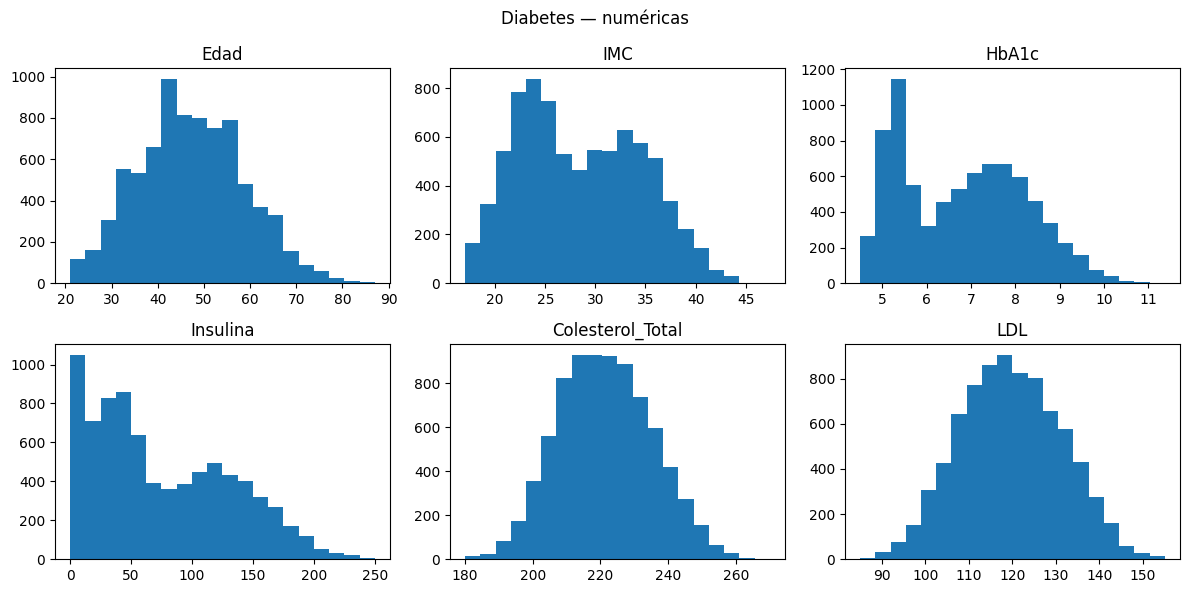

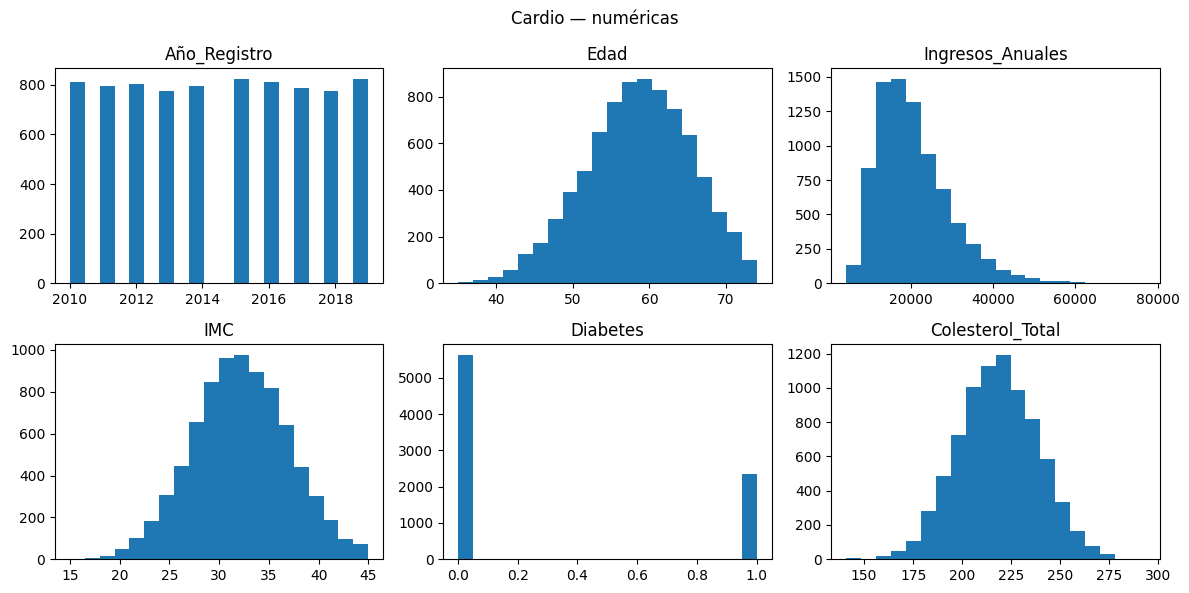

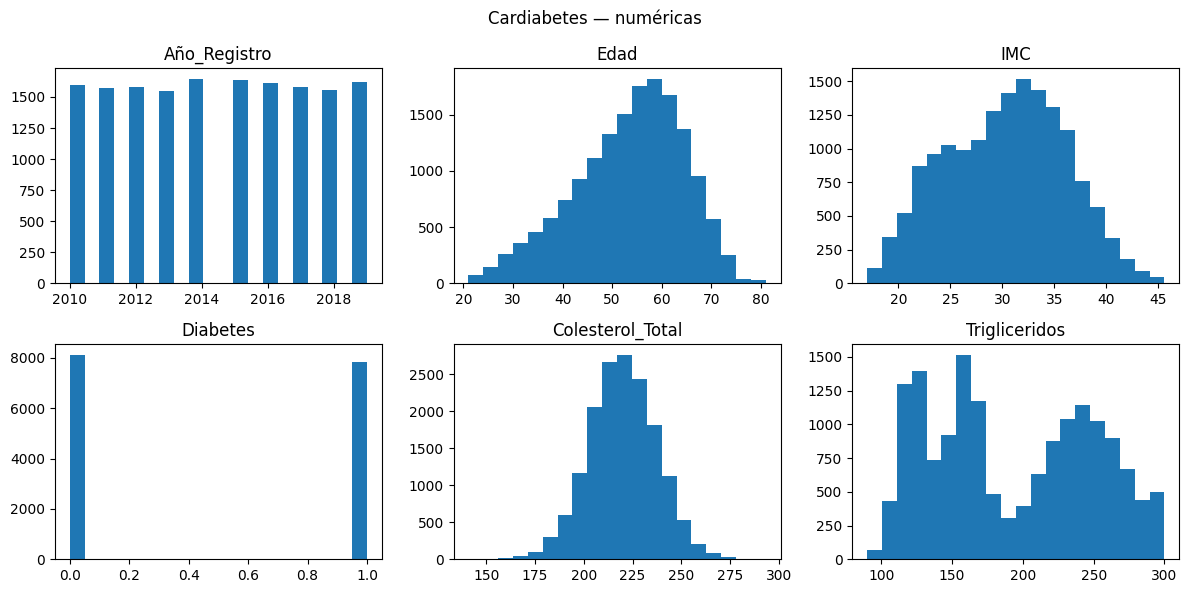

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def hist_grid(df, title, max_cols=6):
    num = df.select_dtypes(include=np.number).iloc[:, :max_cols]
    if num.empty:
        print(f"[{title}] No hay columnas numéricas."); return
    rows = (len(num.columns)+2)//3
    fig, axes = plt.subplots(rows, 3, figsize=(12, 3*rows))
    axes = axes.ravel()
    for i, c in enumerate(num.columns):
        axes[i].hist(num[c].dropna(), bins=20)
        axes[i].set_title(c)
    for j in range(i+1, len(axes)): axes[j].axis("off")
    fig.suptitle(title); fig.tight_layout(); plt.show()

hist_grid(df_diabetes, "Diabetes — numéricas")
hist_grid(df_cardio, "Cardio — numéricas")
hist_grid(df_cardiabetes, "Cardiabetes — numéricas")
